# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [2]:
print(data.info()) #первый способ проверки пропусков
print(pd.isnull(data).sum()) #второй способ проверки пропусков

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
None
TV           0
radio        0
newspaper    0
sales        0
dtype: int64


Пропусков нет, удаление не требуется.

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [3]:
n = len(data) #количество строк
X = data[['TV', 'radio', 'newspaper']].values.reshape(n,3) #вектор признаков (предикторов) X 
y = data['sales'] #вектор целевой переменной y

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [4]:
X_extended = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [9]:
X_norm = X_extended / np.sqrt(np.sum(np.square(X_extended), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [10]:
w = np.zeros(X_norm.shape[1])
 
for iteration in range(1000):
    r = y - X_norm.dot(w)
    for j in range(len(w)):
        r = r + X_norm[:, j] * w[j]
        w[j] = X_norm[:, j].dot(r)
        r = r - X_norm[:, j] * w[j]
 
print(w)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [11]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X_norm, y)
 
print(model.coef_)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Если вы все сделали верно, они должны практически совпасть!

Вывод по координатному спуску: ответы, полученные двумя способами: ручным (через реализацию алгоритма) и автоматическим (библиотекаLinearRegression из sklearn.linear_model), одинаковые.

In [12]:
mse_error_cd = np.sum((y - np.dot(X_norm, w)) ** 2 ) / len(y)
print('MSE в модели координатного спуска составляет {:.2f}'. format(mse_error_cd))

mae_error_cd = np.sum((np.abs(y - np.dot(X_norm, w)))) / len(y)
print('MAE в модели координатного спуска составляет {:.2f}'. format(mae_error_cd))

MSE в модели координатного спуска составляет 2.78
MAE в модели координатного спуска составляет 1.25


## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [13]:
X_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0) #вариант ручной нормализации по формуле
print(X_scaled)

[[ 9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01]
 [ 5.64664612e-01  1.65000572e+00  1.02862691e+00]
 [-9.25304978e-01  9.00494200e-01  3.84117072e+00]
 [ 1.56887609e+00  1.10306488e+00  1.16211917e+00]
 [-9.08957349e-01 -1.86635121e-01 -5.64073843e-01]
 [ 3.00679600e-03  4.29449843e-

**Добавим единичный столбец**

In [14]:
X_final = np.hstack([np.ones(X_scaled.shape[0]).reshape(-1, 1), X_scaled])
X_final

array([[ 1.00000000e+00,  9.69852266e-01,  9.81522472e-01,
         1.77894547e+00],
       [ 1.00000000e+00, -1.19737623e+00,  1.08280781e+00,
         6.69578760e-01],
       [ 1.00000000e+00, -1.51615499e+00,  1.52846331e+00,
         1.78354865e+00],
       [ 1.00000000e+00,  5.20496822e-02,  1.21785493e+00,
         1.28640506e+00],
       [ 1.00000000e+00,  3.94182198e-01, -8.41613655e-01,
         1.28180188e+00],
       [ 1.00000000e+00, -1.61540845e+00,  1.73103399e+00,
         2.04592999e+00],
       [ 1.00000000e+00, -1.04557682e+00,  6.43904671e-01,
        -3.24708413e-01],
       [ 1.00000000e+00, -3.13436589e-01, -2.47406325e-01,
        -8.72486994e-01],
       [ 1.00000000e+00, -1.61657614e+00, -1.42906863e+00,
        -1.36042422e+00],
       [ 1.00000000e+00,  6.16042873e-01, -1.39530685e+00,
        -4.30581584e-01],
       [ 1.00000000e+00, -9.45155670e-01, -1.17923146e+00,
        -2.92486143e-01],
       [ 1.00000000e+00,  7.90028350e-01,  4.96973404e-02,
      

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [15]:
def mse_error(y_real, y_pred):
    mse = np.sum((y_real - y_pred) ** 2) / len(y_real)
    return mse 

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [16]:
y_pred = np.mean(y) #наивный прогноз средним значением
print('MSE для наивного прогноза средним значением составляет {:.2f}'.format (mse_error(y, y_pred)))

MSE для наивного прогноза средним значением составляет 27.09


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [17]:
w = np.zeros(X_final.shape[1]) #вектор весов линейной модели w

def lin_pred(X, w):
    return np.dot(X, w)

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [18]:
def stoch_grad_step(X, y, w, train_ind, eta):
    change_direction = X[train_ind] * 2 * (lin_pred(X[train_ind], w) - y[train_ind]) / len(X[train_ind])
    grad_step = w - change_direction * eta
    return grad_step

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [19]:
def stochastic_gradient_descent(X, y, w_init, max_iter, eta, min_weight_dist, seed):
    weight_dist = np.inf
    w = w_init
    cost_list = []
    iter_num = 0
    np.random.seed(seed)
    
    while weight_dist > min_weight_dist and iter_num < max_iter:
        random_ind = np.random.randint(X.shape[0])
        w_new = stoch_grad_step(X, y, w, random_ind, eta)
        current_error = mse_error(y, lin_pred(X, w_new))
        cost_list.append(current_error)
        
        weight_dist = np.linalg.norm(w-w_new)
        w = w_new
        iter_num += 1
                   
    return w, cost_list

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [20]:
y = np.array(y)
w = np.zeros(X_final.shape[1]) #начальный вектор весов линейной модели w, заполненный нулями
w, cost_list = stochastic_gradient_descent(X_final, y, w_init=w, max_iter=1e5, eta=0.01, min_weight_dist=1e-8, seed=42)

**Постройте график зависимости ошибки от номера итерации**

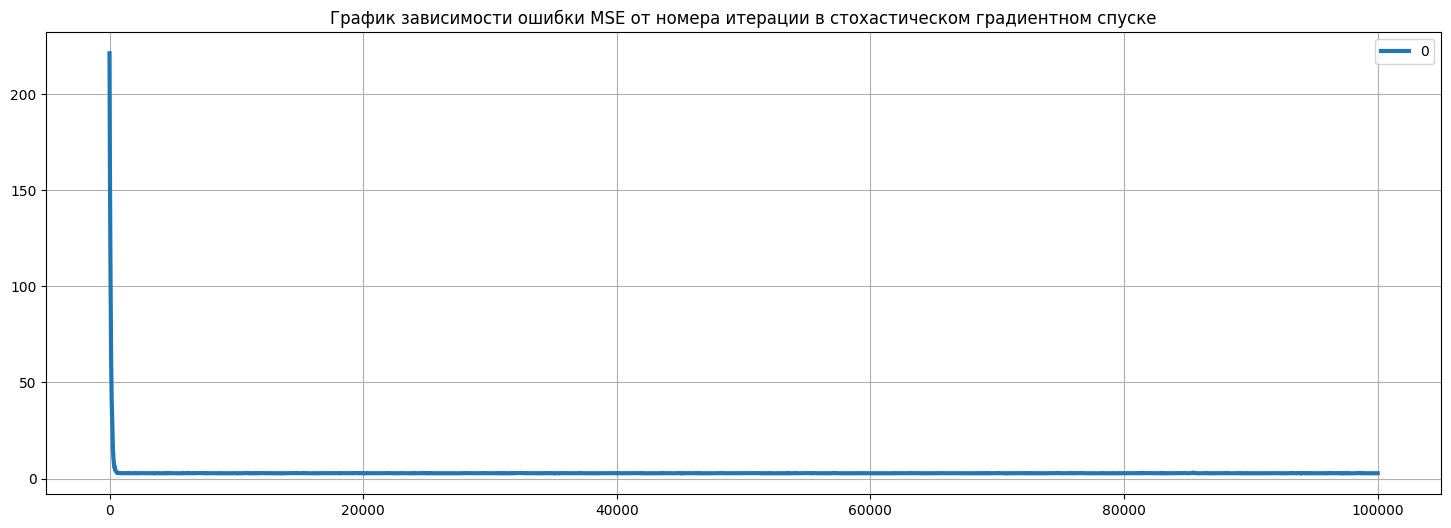

In [21]:
error_df = pd.DataFrame(data=cost_list, index=np.arange(len(cost_list)))
error_df.plot(
    kind='line',
    figsize=(18, 6),
    title='График зависимости ошибки MSE от номера итерации в стохастическом градиентном спуске',
    grid = True,
    lw=3
);

**Выведите вектор весов, к которому сошелся метод.**

In [22]:
print('Вектор весов, к которому сошелся метод: {}'.format(w))

Вектор весов, к которому сошелся метод: [14.00550601  3.93301245  2.92291325  0.05091929]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [23]:
print('Среднеквадратичная ошибку на последней итерации составляет {:.2f}'.format(cost_list[-1]))

Среднеквадратичная ошибку на последней итерации составляет 2.81


In [24]:
mse_error_cd = np.sum((y - np.dot(X_final, w)) ** 2 ) / len(y)
print('MSE в модели координатного спуска составляет {:.2f}'. format(mse_error_cd))

mae_error_cd = np.sum((np.abs(y - np.dot(X_final, w)))) / len(y)
print('MAE в модели координатного спуска составляет {:.2f}'. format(mae_error_cd))

MSE в модели координатного спуска составляет 2.81
MAE в модели координатного спуска составляет 1.26


Итак, если сравнивать и оценивать качество обеих полученных моделей: координатный спуск и стохастический градиентный спуск, - с помощью MSE и MAE, то можно сделать следующий вывод. В координатном спуске MSE и MAE соответственно равны 2.78 и 1.25, а в стохастическом градиентном спуске - 2.81 и 1.26. То есть координатный спуск несколько эффективнее ищет локальные минимумы для гладких функций.